In [1]:
# ABCreconstructedPos_bc.dat
# ABCreconstructedPos.dat
# ABCreconstructedPos_eu.dat
# ABCreconstructedPos_zoom2.dat

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [32]:
plt.rc('font', size=16)

In [28]:
positions = pd.read_hdf("data/reconstructed_postions_simple.hdf")
print(positions.keys())

Index(['x_true', 'y_true', 'x_rec', 'y_rec', 'x_rec_nn', 'y_rec_nn',
       'x_rec_zoom', 'y_rec_zoom', 'd_tpf', 'd_tpf_zoom', 'd_nn'],
      dtype='object')


In [15]:
data_eu = pd.read_csv("ABCreconstructedPos_eu.dat", sep=' ')
data_bc = pd.read_csv("ABCreconstructedPos_bc.dat", sep=' ')
data_test = pd.read_csv("ABCreconstructedPos.dat", sep=' ')
print(data_eu.keys())

Index(['x_ABC_post_mean.euc', 'y_ABC_post_mean.euc', 'dist.ABC.mean.euc'], dtype='object')


In [16]:
data_bc.keys()

Index(['x_ABC_post_mean.bc', 'y_ABC_post_mean.bc', 'dist.ABC.mean.bc'], dtype='object')

In [17]:
data_test.keys()

Index(['x_ABC_post_mean', 'y_ABC_post_mean', 'dist.ABC'], dtype='object')

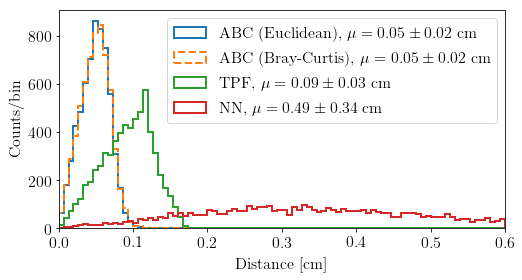

In [50]:
nbins = 90
hist_r = (0, 0.6)

plt.figure(figsize=(8, 4))

mu, std = data_eu['dist.ABC.mean.euc'].mean(), data_eu['dist.ABC.mean.euc'].std()
plt.hist(data_eu['dist.ABC.mean.euc'], bins=nbins, range=hist_r, histtype='step', label='ABC (Euclidean), $\mu=%.2f \pm %.2f$~cm' % (mu, std), linewidth=2)

mu, std = data_bc['dist.ABC.mean.bc'].mean(), data_bc['dist.ABC.mean.bc'].std()
plt.hist(data_bc['dist.ABC.mean.bc'], bins=nbins, range=hist_r, histtype='step', label='ABC (Bray-Curtis), $\mu=%.2f \pm %.2f$~cm' % (mu, std), linewidth=2, linestyle='--')

mu, std = positions['d_tpf'].mean(), positions['d_tpf'].std()
plt.hist(positions['d_tpf'], bins=nbins, range=hist_r, histtype='step', label='TPF, $\mu=%.2f \pm %.2f$~cm' % (mu, std), linewidth=2)

mu, std = positions['d_nn'].mean(), positions['d_nn'].std()
plt.hist(positions['d_nn'], bins=nbins, range=hist_r, histtype='step', label='NN, $\mu=%.2f \pm %.2f$~cm' % (mu, std), linewidth=2)

plt.legend(loc='best')
plt.xlim(*hist_r)
plt.xlabel('Distance [cm]')
plt.ylabel('Counts/bin')
#plt.savefig('Figure2_paper.png', bbox_inches='tight', dpi=150)
plt.show()